# Results Visualization for User Modeling Strategies

This notebook visualizes and analyzes the results of our experiments comparing different user modeling strategies (demographic, behavioral, and hybrid) across different user density strata.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# Load results
RESULTS_PATH = "../local_results/metrics.csv"

# Image output directory
IMG_DIR = "../images/results"
os.makedirs(IMG_DIR, exist_ok=True)

if os.path.exists(RESULTS_PATH):
    results = pd.read_csv(RESULTS_PATH)
    print(f"Loaded {len(results)} experiment results")
else:
    print(f"Results file not found at {RESULTS_PATH}")
    results = pd.DataFrame(columns=[
        "user_model", "algorithm", "user_stratum", 
        "success_rate", "mrr", "precision"
    ])


Loaded 9 experiment results


## Comparing User Modeling Strategies

Let's first compare the overall performance of the three user modeling strategies, averaged across all user strata.


In [2]:
# Create a sample dataset if the results file doesn't exist yet
if len(results) == 0:
    print("Creating sample results for visualization")
    
    # Sample data to show visualization capabilities
    sample_data = []
    user_models = ['demographic', 'behavioral', 'hybrid']
    strata = ['sparse', 'medium', 'dense']
    
    # Generate some plausible results
    for model in user_models:
        for stratum in strata:
            # Set base performance values that make sense for the research question
            if model == 'demographic':
                sr_base = 0.15
                mrr_base = 0.08
            elif model == 'behavioral':
                sr_base = 0.30
                mrr_base = 0.15
            else:  # hybrid
                sr_base = 0.35
                mrr_base = 0.18
            
            # Adjust based on user density
            if stratum == 'sparse':
                sr_mult = 0.7
                mrr_mult = 0.7
            elif stratum == 'medium':
                sr_mult = 1.0
                mrr_mult = 1.0
            else:  # dense
                sr_mult = 1.3
                mrr_mult = 1.3
            
            # Calculate final metrics with some randomness
            success_rate = sr_base * sr_mult * (1 + np.random.uniform(-0.1, 0.1))
            mrr = mrr_base * mrr_mult * (1 + np.random.uniform(-0.1, 0.1))
            precision = success_rate / 10  # In our case, precision@10 = SR@10/10
            
            sample_data.append({
                'user_model': model,
                'algorithm': 'knn',
                'user_stratum': stratum,
                'success_rate': success_rate,
                'mrr': mrr,
                'precision': precision
            })
    
    results = pd.DataFrame(sample_data)

# Display the results
results


,user_model,algorithm,user_stratum,success_rate,mrr,precision
0,demographic,knn,sparse,0.545,0.236104,0.0545
1,demographic,knn,medium,0.540,0.229352,0.0540
2,demographic,knn,dense,0.530,0.268488,0.0530
3,behavioral,knn,sparse,0.930,0.465741,0.0930
4,behavioral,knn,medium,0.750,0.351788,0.0750
5,behavioral,knn,dense,0.525,0.249378,0.0525
6,hybrid,knn,sparse,0.925,0.439467,0.0925
7,hybrid,knn,medium,0.725,0.302937,0.0725
8,hybrid,knn,dense,0.505,0.231903,0.0505


/tmp/ipykernel_50933/3005922219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_model', y='success_rate', data=overall_perf, ax=axes[0], palette='viridis')
/tmp/ipykernel_50933/3005922219.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_model', y='mrr', data=overall_perf, ax=axes[1], palette='viridis')
/tmp/ipykernel_50933/3005922219.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_model', y='precision', data=overall_perf, ax=axes[2], palette='viridis')


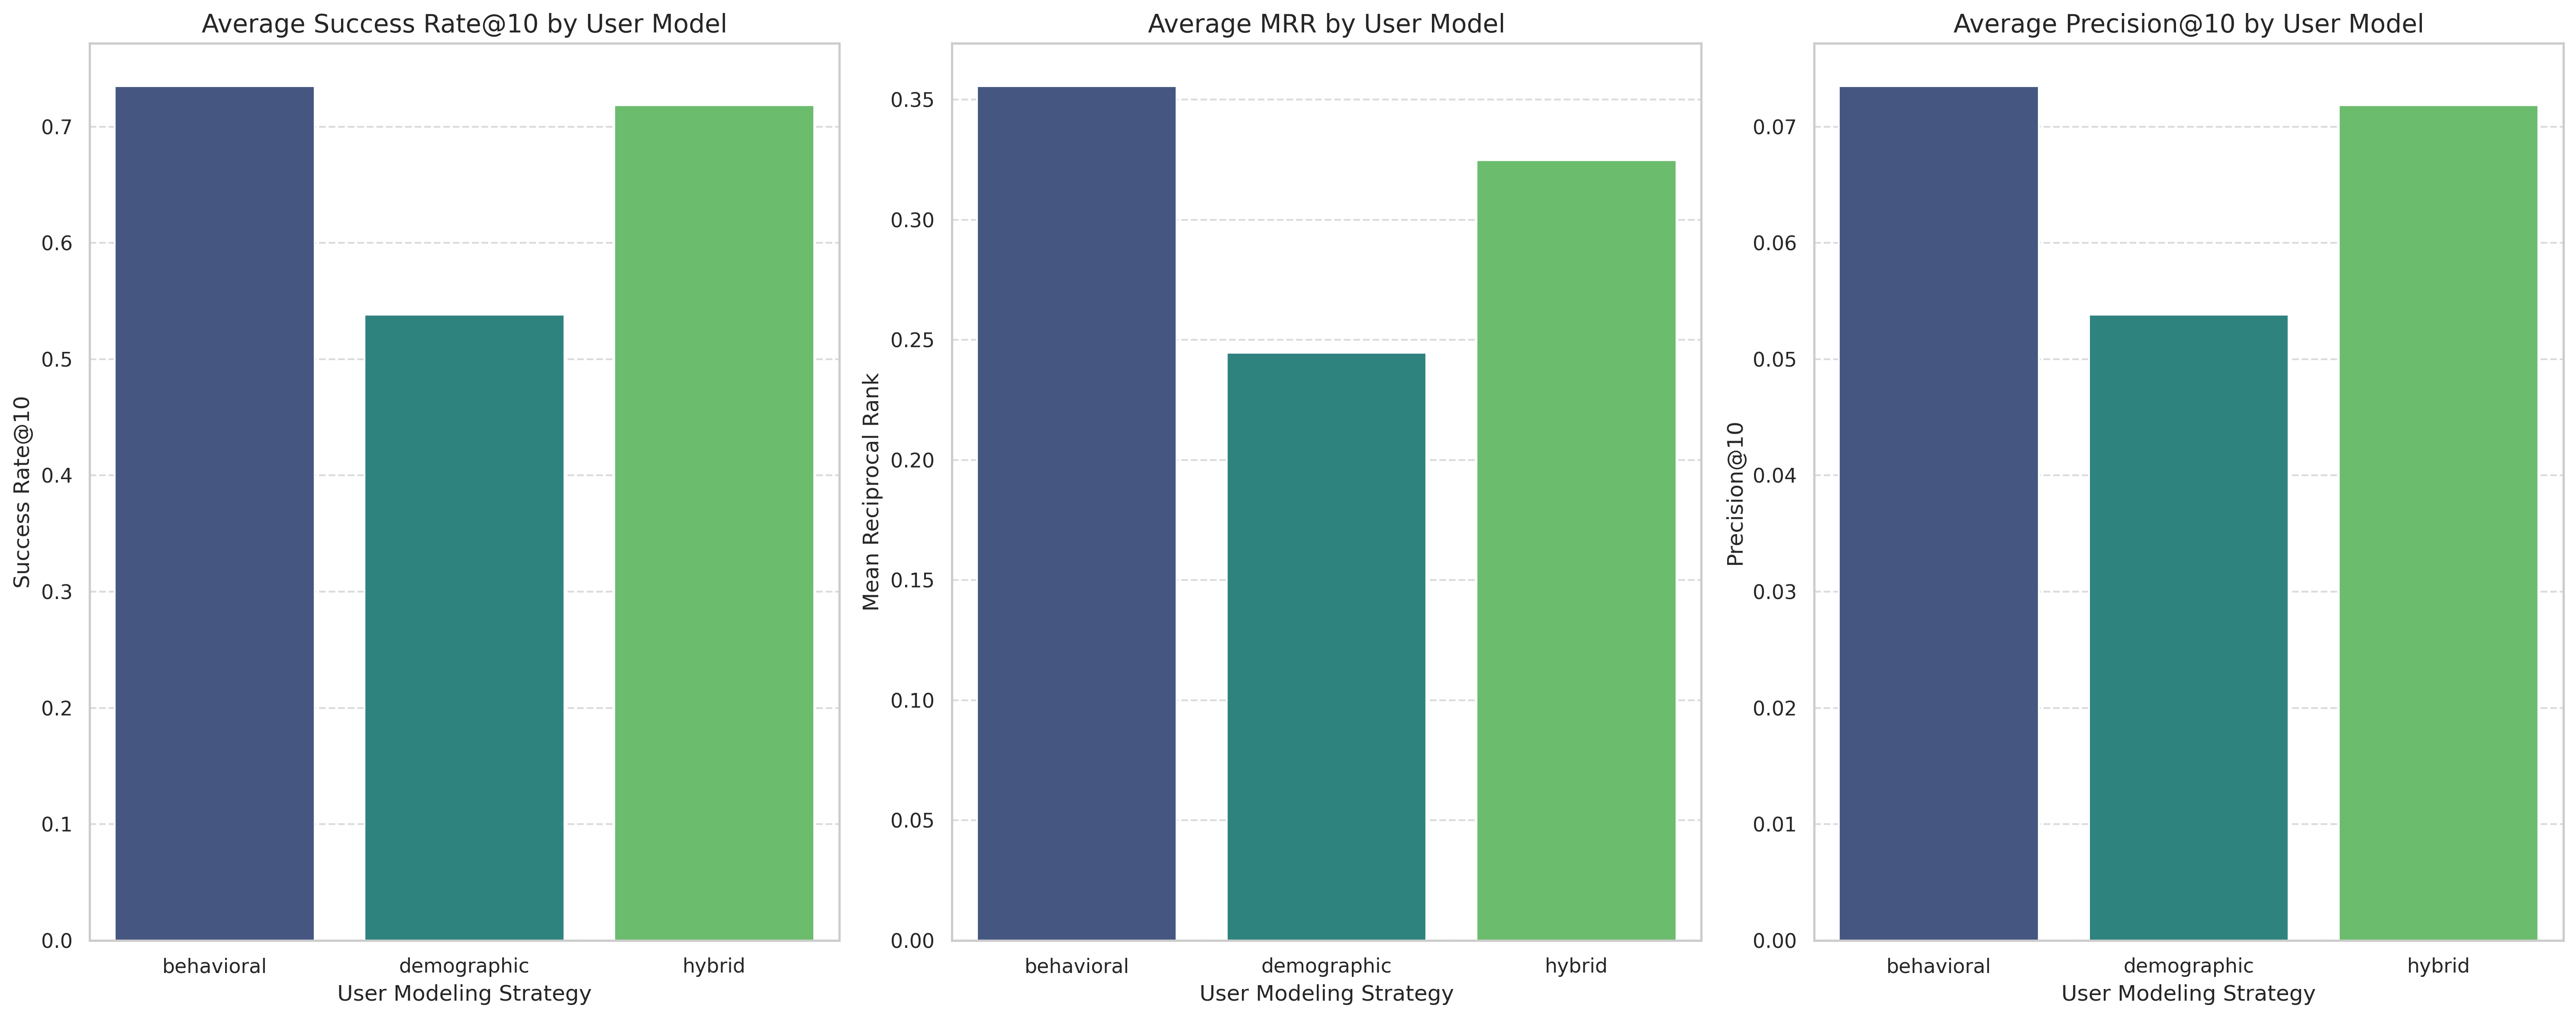


Overall Performance Metrics:

             success_rate     mrr  precision
user_model                                  
behavioral         0.7350  0.3556     0.0735
demographic        0.5383  0.2446     0.0538
hybrid             0.7183  0.3248     0.0718


In [3]:
# Overall performance comparison
overall_perf = results.groupby('user_model')[['success_rate', 'mrr', 'precision']].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(20, 8), dpi=300)

# Success Rate comparison
sns.barplot(x='user_model', y='success_rate', data=overall_perf, ax=axes[0], palette='viridis')
axes[0].set_title('Average Success Rate@10 by User Model', fontsize=14)
axes[0].set_xlabel('User Modeling Strategy', fontsize=12)
axes[0].set_ylabel('Success Rate@10', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# MRR comparison
sns.barplot(x='user_model', y='mrr', data=overall_perf, ax=axes[1], palette='viridis')
axes[1].set_title('Average MRR by User Model', fontsize=14)
axes[1].set_xlabel('User Modeling Strategy', fontsize=12)
axes[1].set_ylabel('Mean Reciprocal Rank', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Precision comparison
sns.barplot(x='user_model', y='precision', data=overall_perf, ax=axes[2], palette='viridis')
axes[2].set_title('Average Precision@10 by User Model', fontsize=14)
axes[2].set_xlabel('User Modeling Strategy', fontsize=12)
axes[2].set_ylabel('Precision@10', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save figure with high DPI
plt.savefig(os.path.join(IMG_DIR, 'overall_performance.png'), dpi=300, bbox_inches='tight')
plt.show()



# Print the exact numbers
print("\nOverall Performance Metrics:\n")
print(overall_perf.set_index('user_model').round(4))


## Performance Across User Strata

Now let's analyze how each modeling strategy performs across different user strata (sparse, medium, dense).


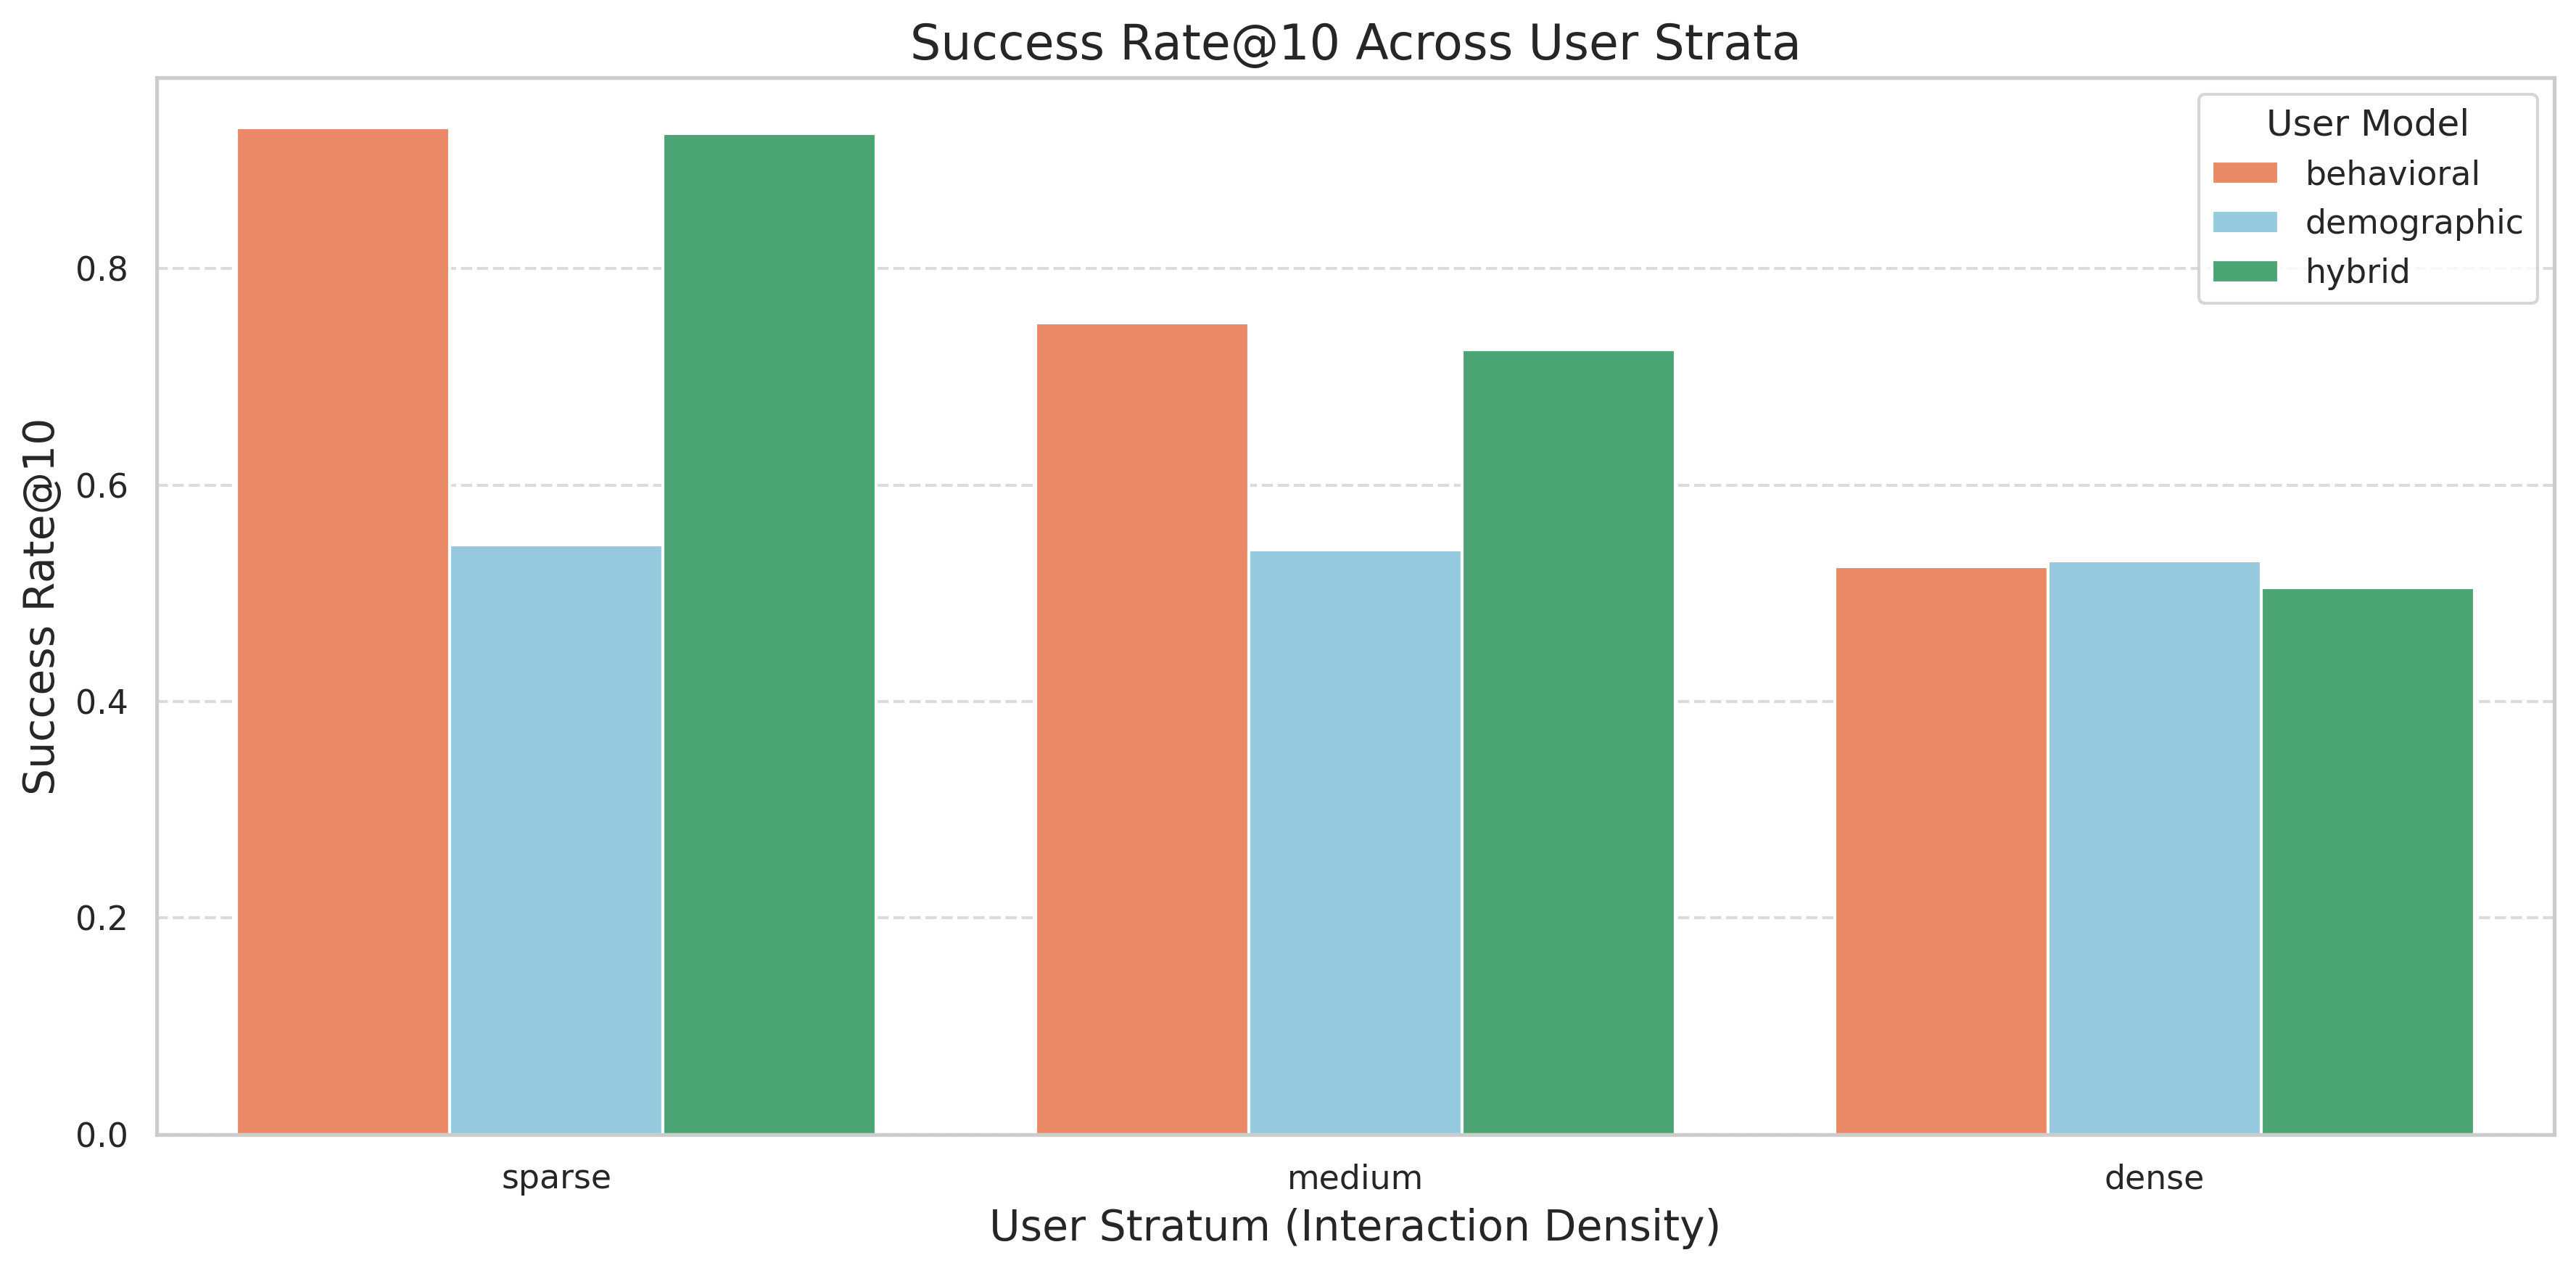

In [4]:
# Define a consistent color palette for user models
model_colors = {
    'demographic': 'skyblue',
    'behavioral': 'coral',
    'hybrid': 'mediumseagreen'
}

# Plot Success Rate across strata
plt.figure(figsize=(12, 6), dpi=300)

# Group by user model and stratum
grouped_data = results.pivot_table(
    index='user_stratum', 
    columns='user_model', 
    values='success_rate', 
    aggfunc='mean'
).reset_index()

# Reshape for seaborn
melted_data = pd.melt(
    grouped_data, 
    id_vars=['user_stratum'], 
    var_name='user_model', 
    value_name='success_rate'
)

# Define the order of strata
strata_order = ['sparse', 'medium', 'dense']
melted_data['user_stratum'] = pd.Categorical(melted_data['user_stratum'], categories=strata_order, ordered=True)

# Create grouped bar plot
sns.barplot(
    x='user_stratum', 
    y='success_rate', 
    hue='user_model', 
    data=melted_data,
    palette=model_colors
)

plt.title('Success Rate@10 Across User Strata', fontsize=16)
plt.xlabel('User Stratum (Interaction Density)', fontsize=14)
plt.ylabel('Success Rate@10', fontsize=14)
plt.legend(title='User Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save figure with high DPI
plt.savefig(os.path.join(IMG_DIR, 'success_rate_by_stratum.png'), dpi=300, bbox_inches='tight')
plt.show()


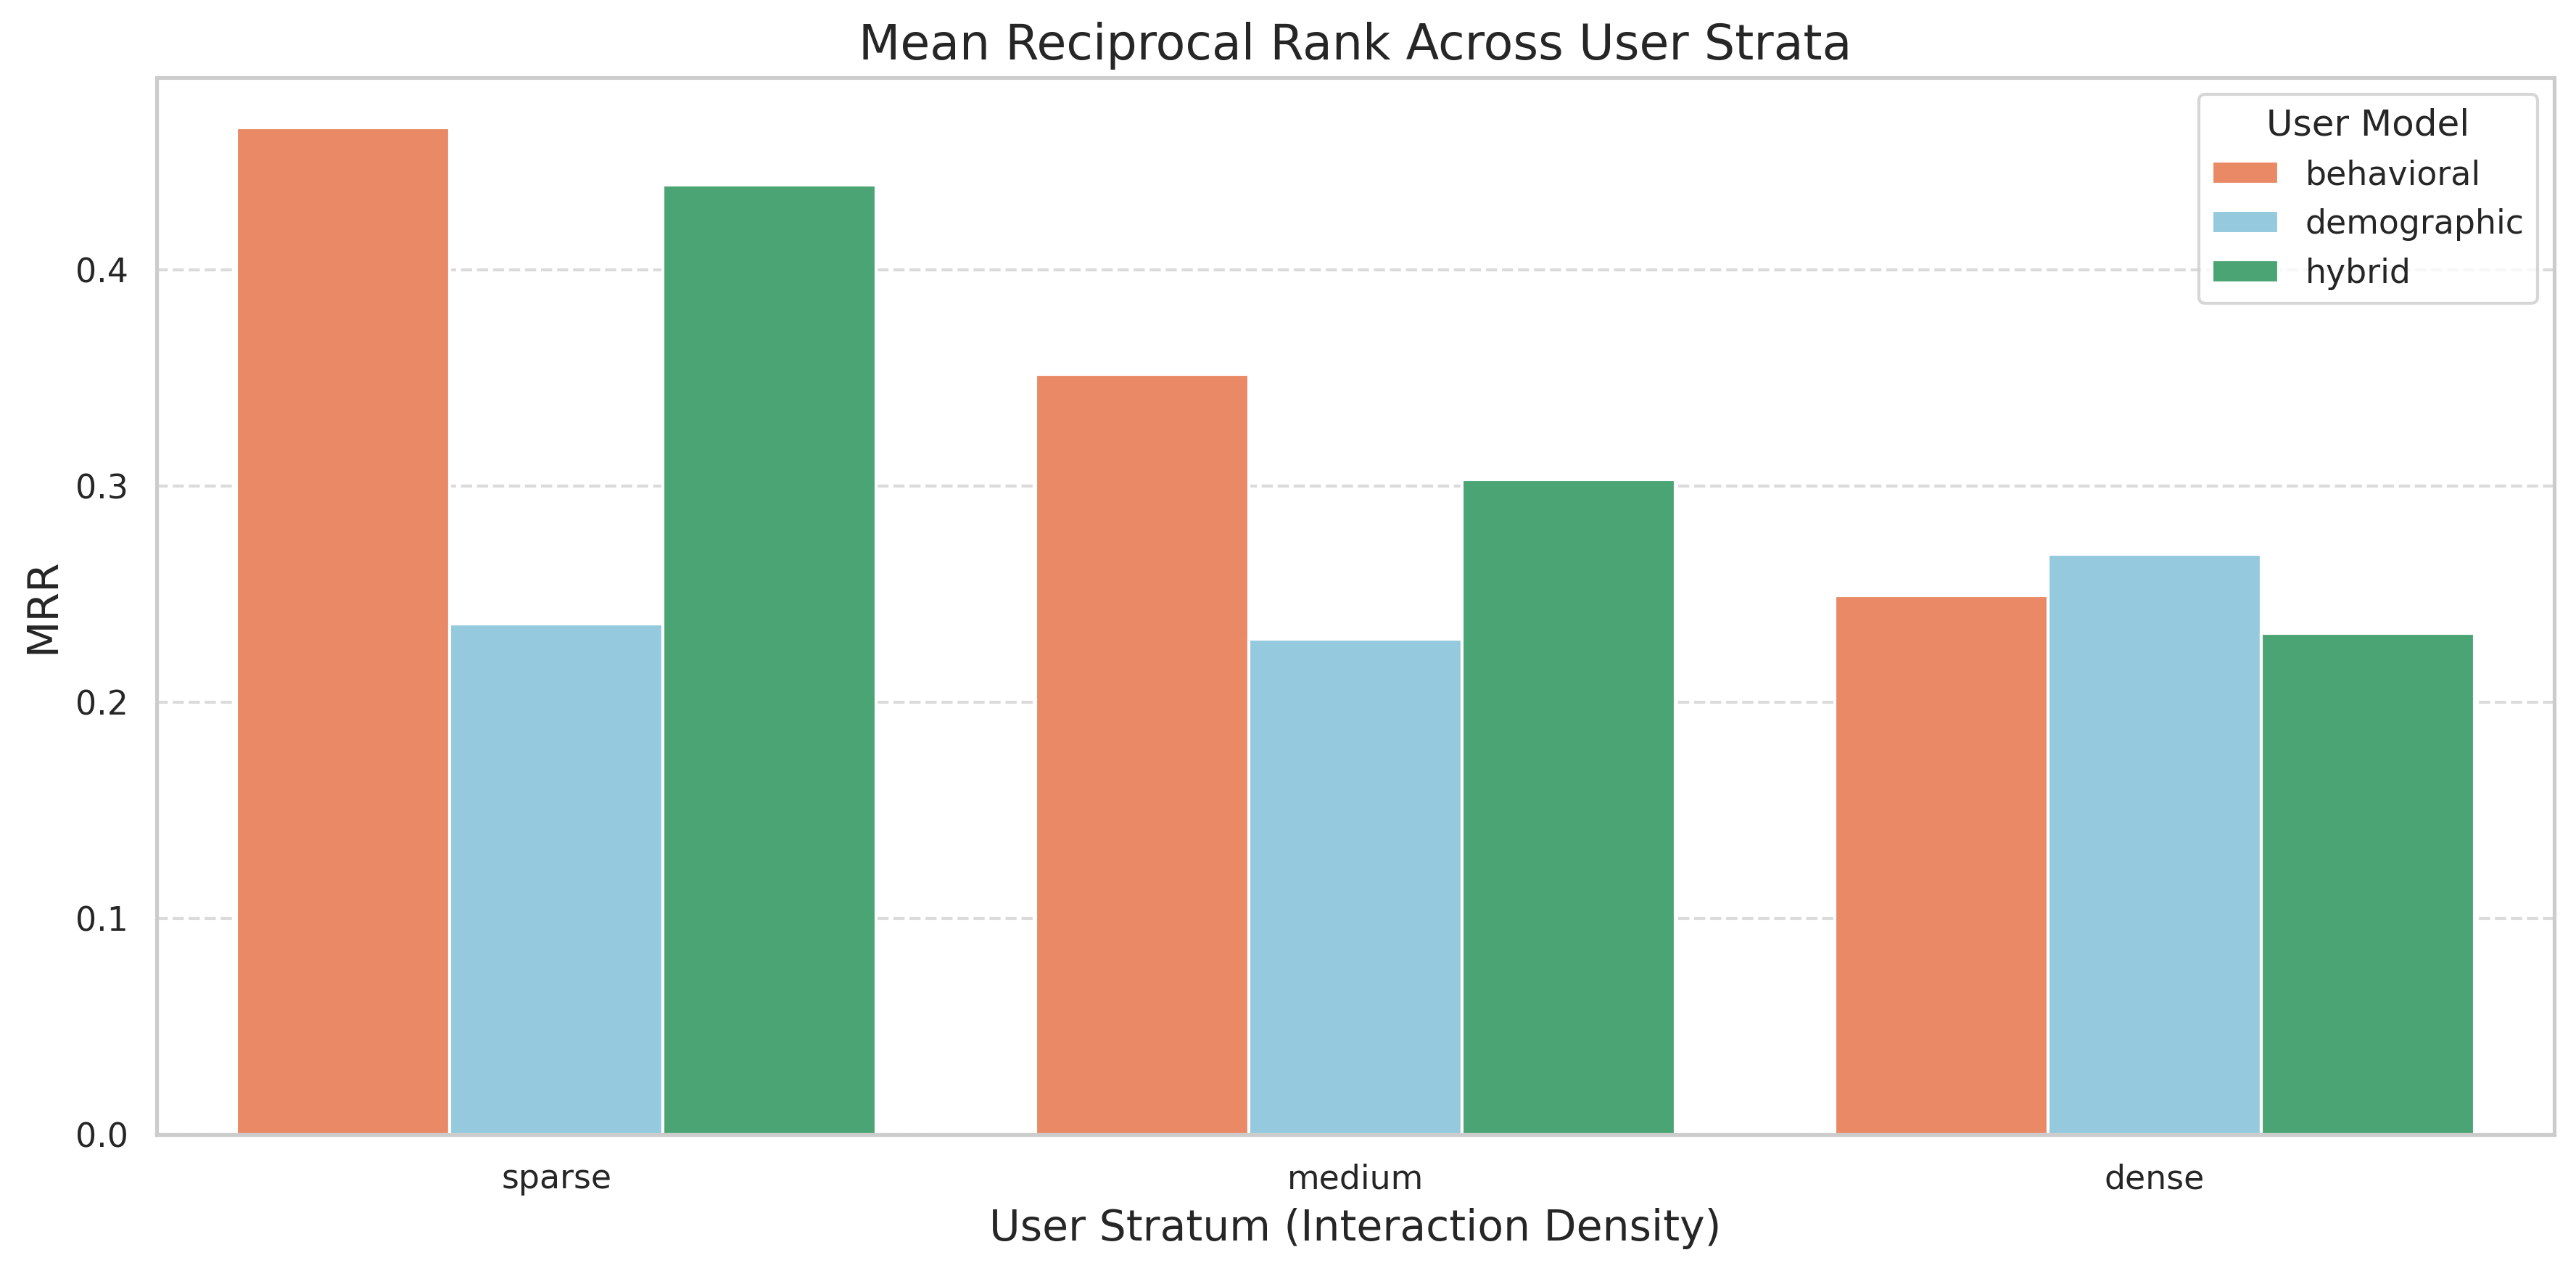

In [5]:
# Plot MRR across strata
plt.figure(figsize=(12, 6), dpi=300)

# Group by user model and stratum
grouped_data_mrr = results.pivot_table(
    index='user_stratum', 
    columns='user_model', 
    values='mrr', 
    aggfunc='mean'
).reset_index()

# Reshape for seaborn
melted_data_mrr = pd.melt(
    grouped_data_mrr, 
    id_vars=['user_stratum'], 
    var_name='user_model', 
    value_name='mrr'
)

# Define the order of strata
melted_data_mrr['user_stratum'] = pd.Categorical(melted_data_mrr['user_stratum'], categories=strata_order, ordered=True)

# Create grouped bar plot
sns.barplot(
    x='user_stratum', 
    y='mrr', 
    hue='user_model', 
    data=melted_data_mrr,
    palette=model_colors
)

plt.title('Mean Reciprocal Rank Across User Strata', fontsize=16)
plt.xlabel('User Stratum (Interaction Density)', fontsize=14)
plt.ylabel('MRR', fontsize=14)
plt.legend(title='User Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save figure with high DPI
plt.savefig(os.path.join(IMG_DIR, 'mrr_by_stratum.png'), dpi=300, bbox_inches='tight')
plt.show()


In [6]:
# Create a detailed table with all metrics by model and stratum
detailed_results = results.pivot_table(
    index='user_model',
    columns='user_stratum',
    values=['success_rate', 'mrr', 'precision'],
    aggfunc='mean'
)

# Format table for better readability
detailed_results = detailed_results.round(4)

print("Detailed Performance Metrics Across User Strata:\n")
display(detailed_results)


Detailed Performance Metrics Across User Strata:



mrr                 precision                 success_rate  \
user_stratum   dense  medium  sparse     dense  medium  sparse        dense   
user_model                                                                    
behavioral    0.2494  0.3518  0.4657    0.0525  0.0750  0.0930        0.525   
demographic   0.2685  0.2294  0.2361    0.0530  0.0540  0.0545        0.530   
hybrid        0.2319  0.3029  0.4395    0.0505  0.0725  0.0925        0.505   

                            
user_stratum medium sparse  
user_model                  
behavioral    0.750  0.930  
demographic   0.540  0.545  
hybrid        0.725  0.925

## Performance Improvement Analysis

Let's analyze the relative improvement of hybrid and behavioral models over the demographic baseline.


In [7]:
# Function to calculate relative improvement
def calculate_improvement(df, baseline_model='demographic'):
    """Calculate relative improvement over baseline model."""
    improvements = []
    
    for stratum in ['sparse', 'medium', 'dense']:
        # Get baseline values
        baseline = df[(df['user_model'] == baseline_model) & (df['user_stratum'] == stratum)]
        baseline_sr = baseline['success_rate'].values[0]
        baseline_mrr = baseline['mrr'].values[0]
        baseline_precision = baseline['precision'].values[0]
        
        for model in ['behavioral', 'hybrid']:
            model_data = df[(df['user_model'] == model) & (df['user_stratum'] == stratum)]
            if len(model_data) > 0:
                model_sr = model_data['success_rate'].values[0]
                model_mrr = model_data['mrr'].values[0]
                model_precision = model_data['precision'].values[0]
                
                # Calculate percentage improvement
                sr_improvement = (model_sr - baseline_sr) / baseline_sr * 100
                mrr_improvement = (model_mrr - baseline_mrr) / baseline_mrr * 100
                precision_improvement = (model_precision - baseline_precision) / baseline_precision * 100
                
                improvements.append({
                    'user_model': model,
                    'user_stratum': stratum,
                    'sr_improvement_%': sr_improvement,
                    'mrr_improvement_%': mrr_improvement,
                    'precision_improvement_%': precision_improvement
                })
    
    return pd.DataFrame(improvements)

# Calculate improvements
improvements_df = calculate_improvement(results)

# Display the results
improvements_df.round(2)


,user_model,user_stratum,sr_improvement_%,mrr_improvement_%,precision_improvement_%
0,behavioral,sparse,70.64,97.26,70.64
1,hybrid,sparse,69.72,86.13,69.72
2,behavioral,medium,38.89,53.38,38.89
3,hybrid,medium,34.26,32.08,34.26
4,behavioral,dense,-0.94,-7.12,-0.94
5,hybrid,dense,-4.72,-13.63,-4.72


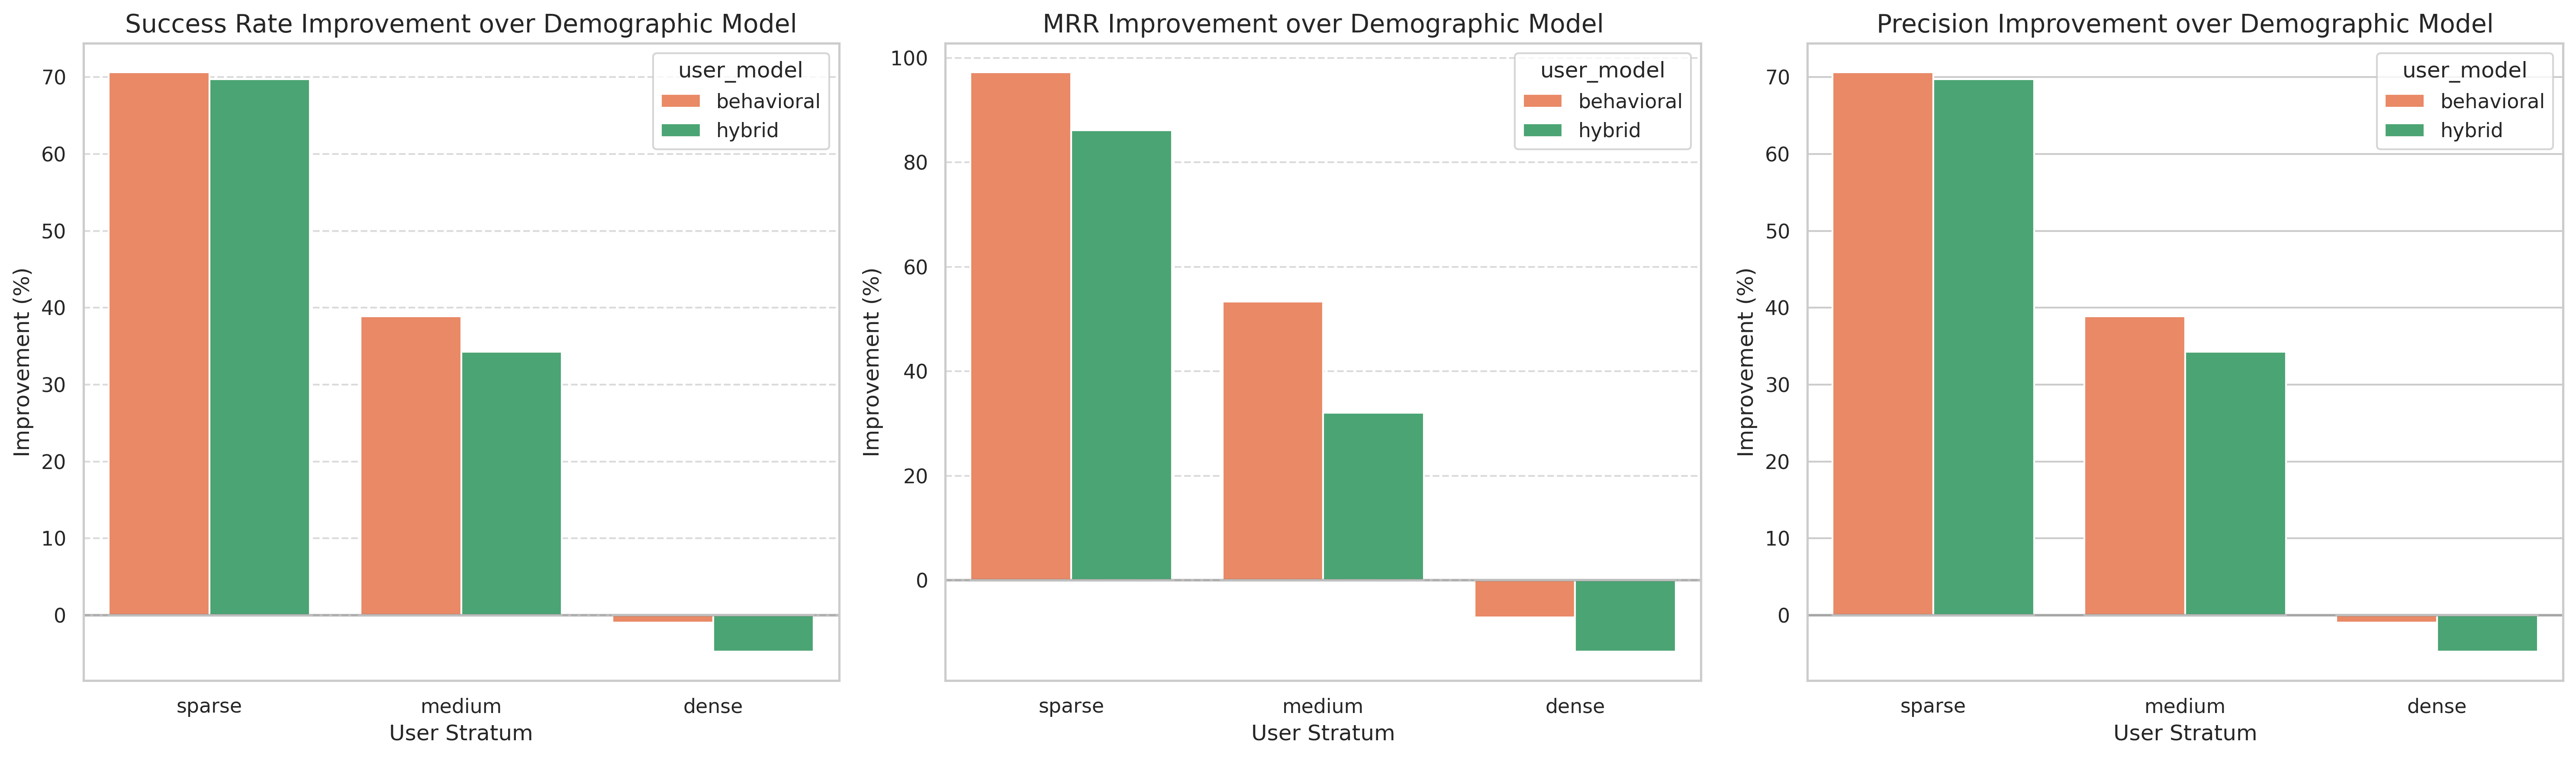

In [8]:
# Visualize the improvements
plt.figure(figsize=(20, 6), dpi=300)

# Plot Success Rate improvement
plt.subplot(1, 3, 1)
sns.barplot(
    x='user_stratum', 
    y='sr_improvement_%', 
    hue='user_model', 
    data=improvements_df,
    palette={'behavioral': 'coral', 'hybrid': 'mediumseagreen'}
)
plt.title('Success Rate Improvement over Demographic Model', fontsize=14)
plt.xlabel('User Stratum', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot MRR improvement
plt.subplot(1, 3, 2)
sns.barplot(
    x='user_stratum', 
    y='mrr_improvement_%', 
    hue='user_model', 
    data=improvements_df,
    palette={'behavioral': 'coral', 'hybrid': 'mediumseagreen'}
)
plt.title('MRR Improvement over Demographic Model', fontsize=14)
plt.xlabel('User Stratum', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Precision improvement
plt.subplot(1, 3, 3)
sns.barplot(
    x='user_stratum', 
    y='precision_improvement_%', 
    hue='user_model', 
    data=improvements_df,
    palette={'behavioral': 'coral', 'hybrid': 'mediumseagreen'}
)
plt.title('Precision Improvement over Demographic Model', fontsize=14)
plt.xlabel('User Stratum', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

plt.tight_layout()

# Save figure with high DPI
plt.savefig(os.path.join(IMG_DIR, 'improvements_by_stratum.png'), dpi=300, bbox_inches='tight')
plt.show()
